In [1]:
import pandas as pd
import requests
import numpy as np
import datetime

import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

# set figure size
plt.rcParams["figure.figsize"] = (8,6)

# specify decimal places to display
pd.set_option('display.float_format', lambda x: '%.2f' % x)

import acquire
from acquire import get_items, get_stores, get_sales, get_full_data, get_germany_data

The end result of this exercise should be a file named prepare.py.

Using your store items data, answer the following:

In [2]:
df = get_full_data()
df.head(3)

,Unnamed: 0_x,item,sale_amount,sale_date,sale_id,store,Unnamed: 0_y,store_address,store_city,store_id,store_state,store_zipcode,Unnamed: 0,item_brand,item_id,item_name,item_price,item_upc12,item_upc14
0,0,1,13.00,"Tue, 01 Jan 2013 00:00:00 GMT",1,1,0,12125 Alamo Ranch Pkwy,San Antonio,1,TX,78253,0,Riceland,1,Riceland American Jazmine Rice,0.84,35200264013,35200264013
1,1,1,11.00,"Wed, 02 Jan 2013 00:00:00 GMT",2,1,0,12125 Alamo Ranch Pkwy,San Antonio,1,TX,78253,0,Riceland,1,Riceland American Jazmine Rice,0.84,35200264013,35200264013
2,2,1,14.00,"Thu, 03 Jan 2013 00:00:00 GMT",3,1,0,12125 Alamo Ranch Pkwy,San Antonio,1,TX,78253,0,Riceland,1,Riceland American Jazmine Rice,0.84,35200264013,35200264013


In [3]:
df.shape

(913000, 19)

In [4]:
#clean up df
df = df.drop(columns = ['Unnamed: 0_x', 'Unnamed: 0_y', 'Unnamed: 0', 'store', 'item'])
df.head(3)        

,sale_amount,sale_date,sale_id,store_address,store_city,store_id,store_state,store_zipcode,item_brand,item_id,item_name,item_price,item_upc12,item_upc14
0,13.00,"Tue, 01 Jan 2013 00:00:00 GMT",1,12125 Alamo Ranch Pkwy,San Antonio,1,TX,78253,Riceland,1,Riceland American Jazmine Rice,0.84,35200264013,35200264013
1,11.00,"Wed, 02 Jan 2013 00:00:00 GMT",2,12125 Alamo Ranch Pkwy,San Antonio,1,TX,78253,Riceland,1,Riceland American Jazmine Rice,0.84,35200264013,35200264013
2,14.00,"Thu, 03 Jan 2013 00:00:00 GMT",3,12125 Alamo Ranch Pkwy,San Antonio,1,TX,78253,Riceland,1,Riceland American Jazmine Rice,0.84,35200264013,35200264013


In [5]:
df.shape

(913000, 14)

In [6]:
#reorder the columns
df = df[['store_id', 
         'item_id', 
         'sale_id', 
         'sale_date', 
         'sale_amount', 
         'item_upc14', 
         'item_upc12', 
         'item_brand', 
         'item_name', 
         'item_price', 
         'store_address', 
         'store_zipcode', 
         'store_city', 
         'store_state']]

df.head(1).T

,0
store_id,1
item_id,1
sale_id,1
sale_date,"Tue, 01 Jan 2013 00:00:00 GMT"
sale_amount,13.00
item_upc14,35200264013
item_upc12,35200264013
item_brand,Riceland
item_name,Riceland American Jazmine Rice
item_price,0.84


In [7]:
df.isnull().sum()

store_id         0
item_id          0
sale_id          0
sale_date        0
sale_amount      0
item_upc14       0
item_upc12       0
item_brand       0
item_name        0
item_price       0
store_address    0
store_zipcode    0
store_city       0
store_state      0
dtype: int64

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 913000 entries, 0 to 912999
Data columns (total 14 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   store_id       913000 non-null  int64  
 1   item_id        913000 non-null  int64  
 2   sale_id        913000 non-null  int64  
 3   sale_date      913000 non-null  object 
 4   sale_amount    913000 non-null  float64
 5   item_upc14     913000 non-null  int64  
 6   item_upc12     913000 non-null  int64  
 7   item_brand     913000 non-null  object 
 8   item_name      913000 non-null  object 
 9   item_price     913000 non-null  float64
 10  store_address  913000 non-null  object 
 11  store_zipcode  913000 non-null  int64  
 12  store_city     913000 non-null  object 
 13  store_state    913000 non-null  object 
dtypes: float64(2), int64(6), object(6)
memory usage: 104.5+ MB


### 1. Convert date column to datetime format.

In [9]:
#date is in non-standard format
df.sale_date

0         Tue, 01 Jan 2013 00:00:00 GMT
1         Wed, 02 Jan 2013 00:00:00 GMT
2         Thu, 03 Jan 2013 00:00:00 GMT
3         Fri, 04 Jan 2013 00:00:00 GMT
4         Sat, 05 Jan 2013 00:00:00 GMT
                      ...              
912995    Wed, 27 Dec 2017 00:00:00 GMT
912996    Thu, 28 Dec 2017 00:00:00 GMT
912997    Fri, 29 Dec 2017 00:00:00 GMT
912998    Sat, 30 Dec 2017 00:00:00 GMT
912999    Sun, 31 Dec 2017 00:00:00 GMT
Name: sale_date, Length: 913000, dtype: object

In [10]:
from time import strftime

strftime('%a, %d %b %Y %H:%M:%S %Z')
# %A= full day name, 
# %a=abbreviate day name, 
# %d=number day, 
# %b=number month, 
# %Y=year, 
# %Z=time zone
# there is an extra comma, removed
# now use this string to tell pandas how date is formatted

'Fri, 16 Apr 2021 14:58:03 CDT'

In [11]:
#convert the 'sale_date' col to datetime format

df.sale_date = pd.to_datetime(df.sale_date, format='%a, %d %b %Y %H:%M:%S %Z')
df.sale_date

0        2013-01-01 00:00:00+00:00
1        2013-01-02 00:00:00+00:00
2        2013-01-03 00:00:00+00:00
3        2013-01-04 00:00:00+00:00
4        2013-01-05 00:00:00+00:00
                    ...           
912995   2017-12-27 00:00:00+00:00
912996   2017-12-28 00:00:00+00:00
912997   2017-12-29 00:00:00+00:00
912998   2017-12-30 00:00:00+00:00
912999   2017-12-31 00:00:00+00:00
Name: sale_date, Length: 913000, dtype: datetime64[ns, GMT]

In [12]:
df.sale_date = pd.to_datetime(df.sale_date)
df.head(1)

,store_id,item_id,sale_id,sale_date,sale_amount,item_upc14,item_upc12,item_brand,item_name,item_price,store_address,store_zipcode,store_city,store_state
0,1,1,1,2013-01-01 00:00:00+00:00,13.00,35200264013,35200264013,Riceland,Riceland American Jazmine Rice,0.84,12125 Alamo Ranch Pkwy,78253,San Antonio,TX


### 2. Plot the distribution of `sale_amount` and `item_price`.

<AxesSubplot:>

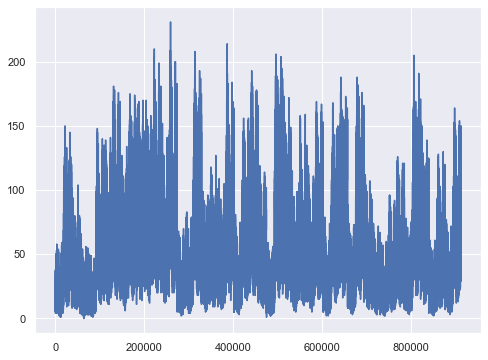

In [13]:
df.sale_amount.plot()

<AxesSubplot:>

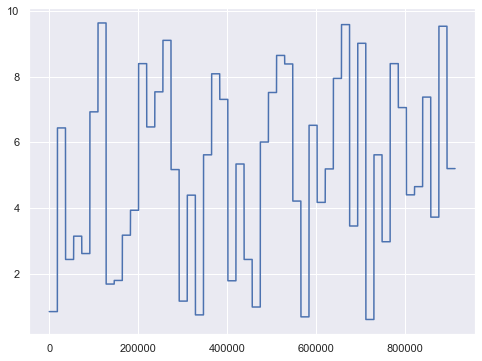

In [14]:
df.item_price.plot()

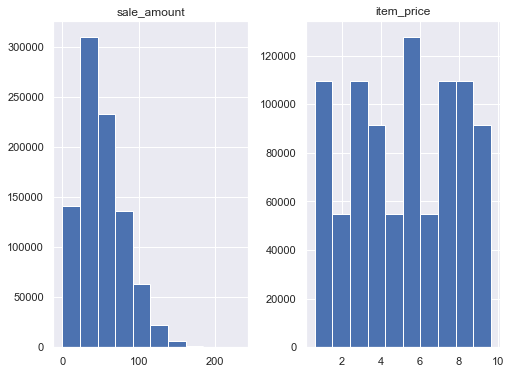

In [15]:
df[['sale_amount', 'item_price']].hist()
plt.show()

### 3. Set the index to be the datetime variable.

In [16]:
df = df.set_index("sale_date").sort_index()
df.head(1)

,store_id,item_id,sale_id,sale_amount,item_upc14,item_upc12,item_brand,item_name,item_price,store_address,store_zipcode,store_city,store_state
sale_date,,,,,,,,,,,,,
2013-01-01 00:00:00+00:00,1,1,1,13.00,35200264013,35200264013,Riceland,Riceland American Jazmine Rice,0.84,12125 Alamo Ranch Pkwy,78253,San Antonio,TX


### 4. Add a 'month' and 'day of week' column to your dataframe.

In [17]:
df['month'] = df.index.month
df['day_of_week'] = df.index.day_name()

df.head(1)

,store_id,item_id,sale_id,sale_amount,item_upc14,item_upc12,item_brand,item_name,item_price,store_address,store_zipcode,store_city,store_state,month,day_of_week
sale_date,,,,,,,,,,,,,,,
2013-01-01 00:00:00+00:00,1,1,1,13.00,35200264013,35200264013,Riceland,Riceland American Jazmine Rice,0.84,12125 Alamo Ranch Pkwy,78253,San Antonio,TX,1,Tuesday


### 5. Add a column to your dataframe, `sales_total`, which is a derived from `sale_amount` (total items) and `item_price`.

In [18]:
df['sales_total'] = df.sale_amount * df.item_price
df.head(1)

,store_id,item_id,sale_id,sale_amount,item_upc14,item_upc12,item_brand,item_name,item_price,store_address,store_zipcode,store_city,store_state,month,day_of_week,sales_total
sale_date,,,,,,,,,,,,,,,,
2013-01-01 00:00:00+00:00,1,1,1,13.00,35200264013,35200264013,Riceland,Riceland American Jazmine Rice,0.84,12125 Alamo Ranch Pkwy,78253,San Antonio,TX,1,Tuesday,10.92


### 6. Make sure all the work that you have done above is reproducible. That is, you should put the code above into separate functions and be able to re-run the functions and get the same results.

In [19]:
def clean_store(df):
    '''
    clean_store will take one argument df, a pandas dataframe and will:
    do initial clean up by dropping unnecessary columns and re-arranging the leftover columns,
    convert date column to datetime format, ,
    set the index to be the datetime variable,
    add a 'month' and 'day of week' column,
    add sales_total column, which is a derived from sale_amount (total items) and item_price,
    plot the distribution of sale_amount and item_price, and
    
    return: a single pandas dataframe with the above operations performed
    '''
    
    #drop unnecessary columns
    df = df.drop(columns = ['Unnamed: 0_x', 'Unnamed: 0_y', 'Unnamed: 0', 'store', 'item'])
    
    #reorder the columns
    df = df[['store_id', 
             'item_id', 
             'sale_id', 
             'sale_date', 
             'sale_amount', 
             'item_upc14', 
             'item_upc12', 
             'item_brand', 
             'item_name', 
             'item_price', 
             'store_address', 
             'store_zipcode', 
             'store_city', 
             'store_state']]
    
    #convert the 'sale_date' col to datetime format
    df.sale_date = pd.to_datetime(df.sale_date, format='%a, %d %b %Y %H:%M:%S %Z')    
    
    #set datetime variable as index
    df = df.set_index("sale_date").sort_index()
    
    #add a 'month' and 'day of week' column
    df['month'] = df.index.month
    df['day_of_week'] = df.index.day_name()
    
    #add sales_total column
    df['sales_total'] = df.sale_amount * df.item_price
    
    #plot the distribution of sale_amount and item_price
    df[['sale_amount', 'item_price']].hist()
    plt.show()
    
    return df

In [20]:
#restart w/ original df to test function above
df = get_full_data()

df.head(1)

,Unnamed: 0_x,item,sale_amount,sale_date,sale_id,store,Unnamed: 0_y,store_address,store_city,store_id,store_state,store_zipcode,Unnamed: 0,item_brand,item_id,item_name,item_price,item_upc12,item_upc14
0,0,1,13.00,"Tue, 01 Jan 2013 00:00:00 GMT",1,1,0,12125 Alamo Ranch Pkwy,San Antonio,1,TX,78253,0,Riceland,1,Riceland American Jazmine Rice,0.84,35200264013,35200264013


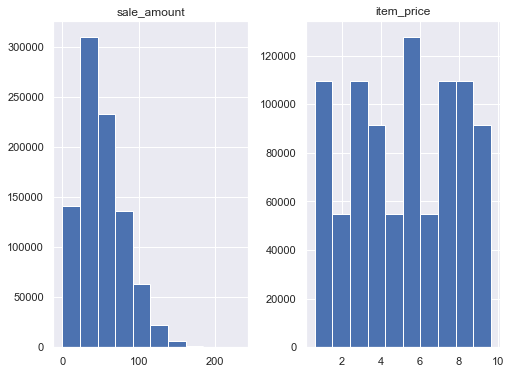

,store_id,item_id,sale_id,sale_amount,item_upc14,item_upc12,item_brand,item_name,item_price,store_address,store_zipcode,store_city,store_state,month,day_of_week,sales_total
sale_date,,,,,,,,,,,,,,,,
2013-01-01 00:00:00+00:00,1,1,1,13.00,35200264013,35200264013,Riceland,Riceland American Jazmine Rice,0.84,12125 Alamo Ranch Pkwy,78253,San Antonio,TX,1,Tuesday,10.92


In [21]:
df = clean_store(df)

df.head(1)

In [22]:
import prepare
from prepare import clean_store

In [23]:
#restart w/ orginal df to test function from prepare.py
df = get_full_data()

df.head(1)

,Unnamed: 0_x,item,sale_amount,sale_date,sale_id,store,Unnamed: 0_y,store_address,store_city,store_id,store_state,store_zipcode,Unnamed: 0,item_brand,item_id,item_name,item_price,item_upc12,item_upc14
0,0,1,13.00,"Tue, 01 Jan 2013 00:00:00 GMT",1,1,0,12125 Alamo Ranch Pkwy,San Antonio,1,TX,78253,0,Riceland,1,Riceland American Jazmine Rice,0.84,35200264013,35200264013


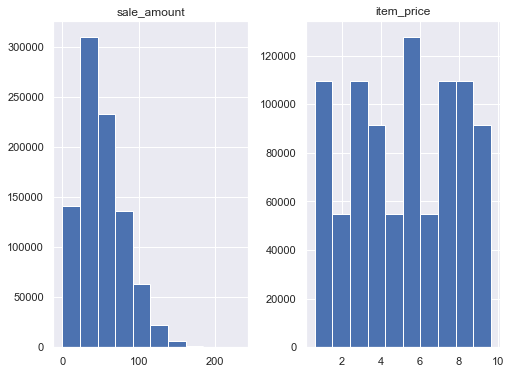

,store_id,item_id,sale_id,sale_amount,item_upc14,item_upc12,item_brand,item_name,item_price,store_address,store_zipcode,store_city,store_state,month,day_of_week,sales_total
sale_date,,,,,,,,,,,,,,,,
2013-01-01 00:00:00+00:00,1,1,1,13.00,35200264013,35200264013,Riceland,Riceland American Jazmine Rice,0.84,12125 Alamo Ranch Pkwy,78253,San Antonio,TX,1,Tuesday,10.92


In [24]:
df = clean_store(df)
df.head(1)

***
Using the OPS data acquired in the Acquire exercises `opsd_germany_daily.csv`, complete the following:

In [25]:
germanydf = get_germany_data()
germanydf.head()

,Date,Consumption,Wind,Solar,Wind+Solar
0,2006-01-01,1069.18,nan,nan,nan
1,2006-01-02,1380.52,nan,nan,nan
2,2006-01-03,1442.53,nan,nan,nan
3,2006-01-04,1457.22,nan,nan,nan
4,2006-01-05,1477.13,nan,nan,nan


In [26]:
germanydf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4383 entries, 0 to 4382
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Date         4383 non-null   object 
 1   Consumption  4383 non-null   float64
 2   Wind         2920 non-null   float64
 3   Solar        2188 non-null   float64
 4   Wind+Solar   2187 non-null   float64
dtypes: float64(4), object(1)
memory usage: 171.3+ KB


### 1. Convert date column to datetime format.

In [27]:
germanydf.Date = pd.to_datetime(germanydf.Date)
germanydf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4383 entries, 0 to 4382
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   Date         4383 non-null   datetime64[ns]
 1   Consumption  4383 non-null   float64       
 2   Wind         2920 non-null   float64       
 3   Solar        2188 non-null   float64       
 4   Wind+Solar   2187 non-null   float64       
dtypes: datetime64[ns](1), float64(4)
memory usage: 171.3 KB


### 2. Plot the distribution of each of your variables.

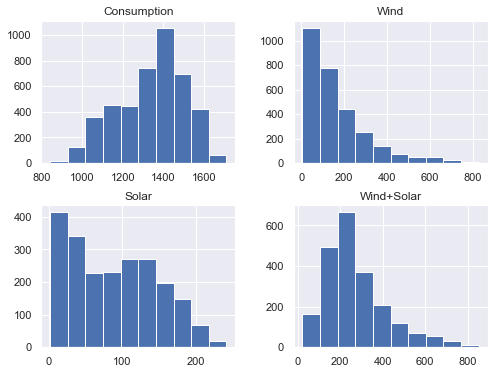

In [28]:
germanydf.hist()
plt.show()

### 3. Set the index to be the datetime variable.

In [29]:
germanydf = germanydf.set_index('Date')
germanydf.head()

,Consumption,Wind,Solar,Wind+Solar
Date,,,,
2006-01-01,1069.18,nan,nan,nan
2006-01-02,1380.52,nan,nan,nan
2006-01-03,1442.53,nan,nan,nan
2006-01-04,1457.22,nan,nan,nan
2006-01-05,1477.13,nan,nan,nan


### 4. Add a month and a year column to your dataframe.

In [30]:
germanydf['Month'] = germanydf.index.month
germanydf['Year'] = germanydf.index.year

germanydf.head()

,Consumption,Wind,Solar,Wind+Solar,Month,Year
Date,,,,,,
2006-01-01,1069.18,nan,nan,nan,1,2006
2006-01-02,1380.52,nan,nan,nan,1,2006
2006-01-03,1442.53,nan,nan,nan,1,2006
2006-01-04,1457.22,nan,nan,nan,1,2006
2006-01-05,1477.13,nan,nan,nan,1,2006


### 5. Fill any missing values.

In [31]:
germanydf.isna().sum()

Consumption       0
Wind           1463
Solar          2195
Wind+Solar     2196
Month             0
Year              0
dtype: int64

In [32]:
#filling in w/ 0 (the nan values in df is missing b/c no data collected here)
germanydf = germanydf.fillna(0)

#check if no missing values
germanydf.isna().sum()

Consumption    0
Wind           0
Solar          0
Wind+Solar     0
Month          0
Year           0
dtype: int64

### 6. Make sure all the work that you have done above is reproducible. That is, you should put the code above into separate functions and be able to re-run the functions and get the same results.

In [33]:
def clean_germany(df):
    '''
    clean_germany will take one argument df, a pandas dataframe and will:
    convert date column to datetime format, ,
    set the index to be the datetime variable,
    add a 'month' and 'year' column,
    fill in missing values with '0',
    plot the distribution of each of the variables, and
    
    return: a single pandas dataframe with the above operations performed
    '''
    
    #convert the 'sale_date' col to datetime format
    df.Date = pd.to_datetime(df.Date)
    
    #set datetime variable as index
    df = df.set_index('Date')
    
    #add a 'month' and 'year' column
    df['Month'] = df.index.month
    df['Year'] = df.index.year
    
    #fill in missing values
    df = df.fillna(0)
    
    #plot the distribution of each of the variables
    df.hist()
    plt.show()
    
    return df

In [34]:
#restart w/ original df to test function above
df = get_germany_data()

df.head(1)

,Date,Consumption,Wind,Solar,Wind+Solar
0,2006-01-01,1069.18,nan,nan,nan


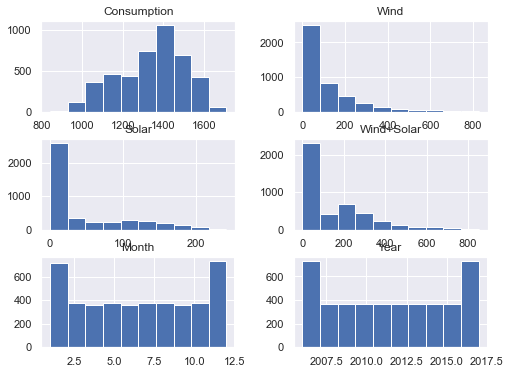

,Consumption,Wind,Solar,Wind+Solar,Month,Year
Date,,,,,,
2006-01-01,1069.18,0.00,0.00,0.00,1,2006


In [35]:
df = clean_germany(df)

df.head(1)

In [36]:
from prepare import clean_germany

In [37]:
#restart w/ orginal df to test function from prepare.py
df = get_germany_data()

df.head(1)

,Date,Consumption,Wind,Solar,Wind+Solar
0,2006-01-01,1069.18,nan,nan,nan


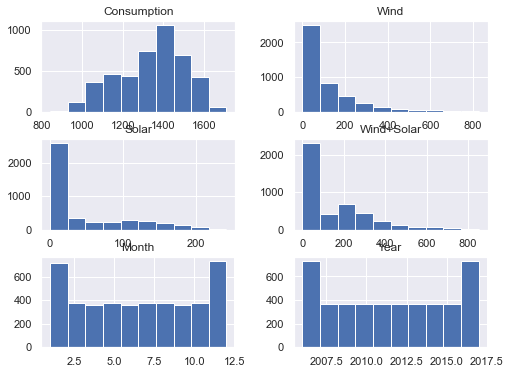

,Consumption,Wind,Solar,Wind+Solar,Month,Year
Date,,,,,,
2006-01-01,1069.18,0.00,0.00,0.00,1,2006


In [38]:
df = clean_germany(df)
df.head(1)